# Engineering Analysis Homework 9

Josh Gregory

## Problem 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1],
              [1, 2, 4, 8], 
              [1, 3, 9, 27], 
              [1, 4, 16, 64]])

y = np.array([[2], [4], [6], [3]])

c = np.linalg.solve(X, y)

print(c)

[[ 5.        ]
 [-7.16666667]
 [ 5.        ]
 [-0.83333333]]


## Problem 2

We want to know how accurate our measurements $x$ need to be so that the coefficients $c$ are accurate to 3 digits (e.g. 0.001). First, we need to find the condition number of $\textbf{X}$. From the problem statement, we know that

In [3]:
x_1 = 60
x_2 = 65
x_3 = 70
x_4 = 75
x_5 = 80

x = np.array([x_1, x_2, x_3, x_4, x_5])

X = np.array([[1, x[i], x[i]**2, x[i]**3, x[i]**4] for i in range(5)])

X = np.array([[1, x[i], x[i]**2, x[i]**3, x[i]**4] for i in range(len(x))])

print(X)

[[       1       60     3600   216000 12960000]
 [       1       65     4225   274625 17850625]
 [       1       70     4900   343000 24010000]
 [       1       75     5625   421875 31640625]
 [       1       80     6400   512000 40960000]]


Calculate the condition number of $\textbf{X}$ now:

In [4]:
condition_number = np.linalg.cond(X)

condition_number

803344432592.3431

We know that we want the following to be true:

$$
\left( \text{relative error in } c \right) \leq \left( \text{cond. \# of } \textbf{X} \right) \left( \text{relative error in } y \right)
$$

Since we know we want the relative error in $c$ to be around 0.001 and we know the condition number of $\textbf{X}$, dividing the two gives us our relative error in $y$, that is:

$$
\frac{\text{relative error in }c }{ \text{cond. \# of } \textbf{X} } \leq \text{relative error in }y
$$

Performing this, we get that

In [5]:
precision = 0.001 / condition_number

precision

1.244796079277056e-15

Therefore, the precision in our measurements $y$ must be greater than or equal to $1.2448 \times 10^{-15}$.

## Problem 3

Our data for $x$ and $y$ is as follows:

In [6]:
x = np.arange(0, 31, 2)
y = np.round(np.sin(x), 4)

rng = np.arange(0, 30.01, 0.1)

# print(len(x))

### Part A

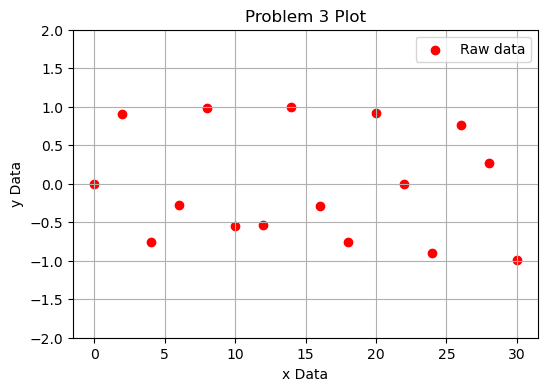

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(x, y, color='red', label='Raw data')
plt.xlabel('x Data')
plt.ylabel('y Data')
plt.ylim([-2, 2])
plt.title('Problem 3 Plot')
plt.legend()
plt.grid(True)

### Part B

In [8]:
L = len(x)

X = np.zeros((L, L))

for i in range(L):
    for j in range(L):
        X[i, j] = x[i]**j

c = np.linalg.solve(X, y)

print(c)

[ 0.00000000e+00 -1.70048649e+01  2.51375555e+01 -1.42041728e+01
  4.16987719e+00 -7.21136539e-01  7.80546823e-02 -5.41325800e-03
  2.38620420e-04 -6.35781745e-06  8.85149491e-08 -3.32968283e-10
 -3.37466090e-12 -9.56833673e-17 -2.13765639e-18  2.24143225e-19]


In [9]:
rng = np.arange(0, 30.01, 0.1)

poly = lambda x: sum([c[i]*x**i for i in range(len(c))])

# def coef_plot(x, c):
    
#     return sum([c[i]*x**i for i in range(x)])

### Part C

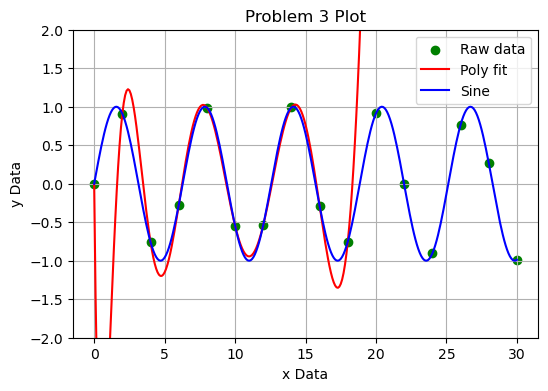

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(x, y, color='green', label='Raw data')
plt.plot(rng, poly(rng), color='red', label='Poly fit')
plt.plot(rng, np.sin(rng), color='blue', label='Sine')
plt.legend()
plt.xlabel('x Data')
plt.ylabel('y Data')
plt.ylim([-2, 2])
plt.title('Problem 3 Plot')
plt.grid(True)

### Part D

We can see that the polynomial fit matches the expression $f(x) = \sin(x)$ pretty well for $x$-values between about 5 and 15, but outside of those bounds the polynomial fit is greatly overfitting the data, with significant swings (see $x$-values between 0 to 5 and 15-20). 

## Problem 4

Let $X$ be

$$
X = 
\begin{bmatrix}
2 & 1 & 7 \\
8 & 1 & 9 \\
4 & 4 & 5 
\end{bmatrix}
$$

In [11]:
x_1 = 60
x_2 = 65
x_3 = 70
x_4 = 75
x_5 = 80

x = np.array([x_1, x_2, x_3, x_4, x_5])

X = np.array([[1, x[i], x[i]**2, x[i]**3, x[i]**4] for i in range(5)])

X = np.array([[1, x[i], x[i]**2, x[i]**3, x[i]**4] for i in range(len(x))])

cond_X = np.linalg.cond(X)

cond_X

803344432592.3431

In [12]:
phat_X = np.linalg.cond(np.linalg.inv(X.T @ X) @ X.T)

print(phat_X)

803339752772.9869


From these two outputs, we can see that if the matrix $X$ is ill-conditioned, the condition numbers of both $X$ and $\left(X^\top X \right)^{-1} X^\top$ are approximately the same. While they are slightly different, this is most likely due to the floating-point precision of the machine these calculations are being run on.

## Problem 5

In [13]:
x_pos = np.arange(2, 51, 3)
data_range = np.arange(2, 51, 0.01)

y_temp = np.array([881.5, 775.5, 509.2, 304.4, 535.5, 365.2, 273.3, 228.1, 148.6, 134.6, 89.6, 66.7, 268.1, 61.5, 49.8, 52.8, 70.5])

### Part A

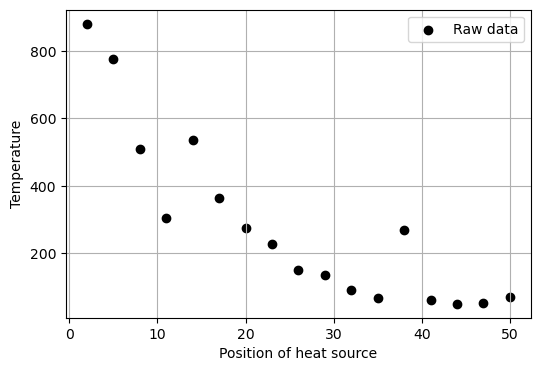

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(x_pos, y_temp, color='black', label='Raw data')
plt.xlabel('Position of heat source')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)

Define arrays of data:

In [15]:
x_pos = np.arange(2, 51, 3)
data_range = np.arange(2, 51, 0.01)

y_temp = np.array([881.5, 775.5, 509.2, 304.4, 535.5, 365.2, 273.3, 228.1, 148.6, 134.6, 89.6, 66.7, 268.1, 61.5, 49.8, 52.8, 70.5])

### Part B

In [16]:
def poly_fit(order):
    L = len(x_pos)
    X = np.zeros((L, order+1)) #two columns for linear system

    for i in range(L):
        for j in range(order+1):
            X[i,j] = x_pos[i]**j

    X_T = np.transpose(X)
    X_TX = np.matmul(X_T, X)
    inv_X_TX = np.linalg.inv(X_TX)
    c = np.matmul(np.matmul(inv_X_TX, X_T), y_temp)

    coefs = lambda x: sum(c[i]*x**i for i in range(order+1))

    return coefs

Text(0.5, 1.0, 'Part b (Linear fit)')

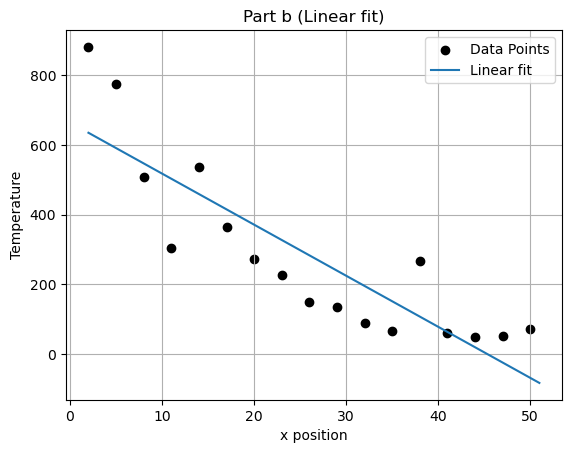

In [17]:
order_1 = poly_fit(1)

plt.scatter(x_pos, y_temp, color='black', label='Data Points')
plt.plot(data_range, order_1(data_range), label='Linear fit')
plt.xlabel('x position')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend()
plt.title('Part b (Linear fit)')


### Part C

Text(0.5, 1.0, 'Part c (Cubic fit)')

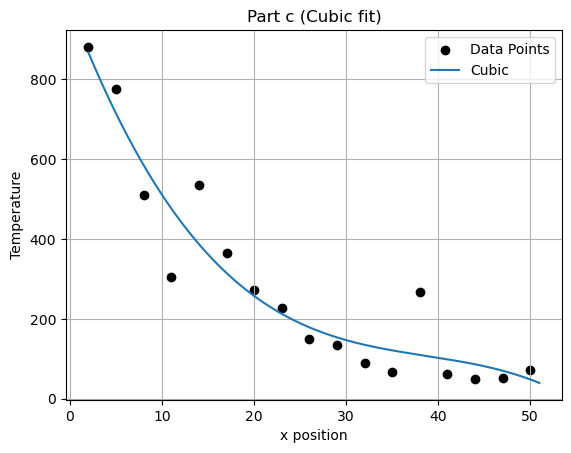

In [21]:
order_3 = poly_fit(3)

plt.scatter(x_pos, y_temp, color='black', label='Data Points')
plt.plot(data_range, order_3(data_range), label='Cubic')
plt.xlabel('x position')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.title('Part c (Cubic fit)')

### Part D

Text(0.5, 1.0, 'Fits')

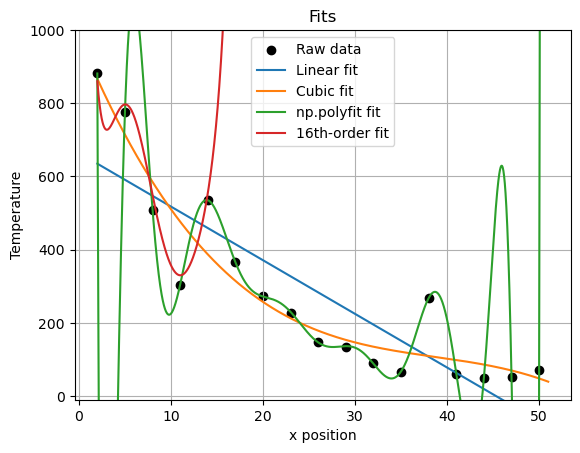

In [22]:
m = len(x_pos)

order_large = poly_fit(order=m-1)

coef = np.polyfit(x_pos, y_temp, deg=15)

plot_poly = np.poly1d(coef)

plt.scatter(x_pos, y_temp, color='black', label='Raw data')
plt.plot(data_range, order_1(data_range), label='Linear fit')
plt.plot(data_range, order_3(data_range), label='Cubic fit')
plt.plot(data_range, plot_poly(data_range), label='np.polyfit fit')
plt.plot(data_range, order_large(data_range), label='16th-order fit')
# plt.plot(x_pos, np.polyfit(x_pos, y_temp, deg=16), label='np.polyfit')
plt.xlabel('x position')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend()
plt.ylim(-10, 1000)
plt.title('Fits')


### Part E

From the plot above, we can see that the cubic fit fits the data the best. The linear fit is not capturing the exponential-decay-like curve of the data, while the 16th-order fit overfits the initial data points before exploding off to infity, which can be seen in the plot below:

Text(0.5, 1.0, 'Fits')

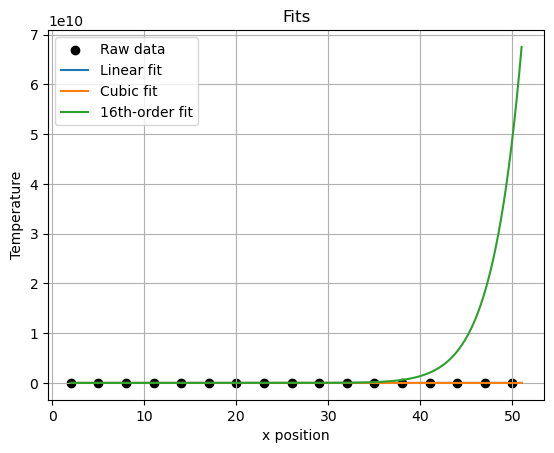

In [23]:
plt.scatter(x_pos, y_temp, color='black', label='Raw data')
plt.plot(data_range, order_1(data_range), label='Linear fit')
plt.plot(data_range, order_3(data_range), label='Cubic fit')
plt.plot(data_range, order_large(data_range), label='16th-order fit')
plt.xlabel('x position')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend()
# plt.ylim(-10, 1000)
plt.title('Fits')

The difference between the fits using our LU decomposition method and the built-in one from NumPy is that the NumPy version uses SVD, leading to a more numerically stable.